<a href="https://colab.research.google.com/github/madhuriveerla/predictive-analytics/blob/next-product-prediciton/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Bedrooms  Bathrooms  SquareFeet  Age   Price
0         2          1        1000   10  150000
1         3          2        1500    5  220000
2         4          3        2000    2  300000
3         3          2        1600    7  240000
4         5          4        2500    1  400000

Mean Squared Error: 14182334.710743722
R² Score: 0.9943270661157025

Predicted Price for new house: 273568.1818181818


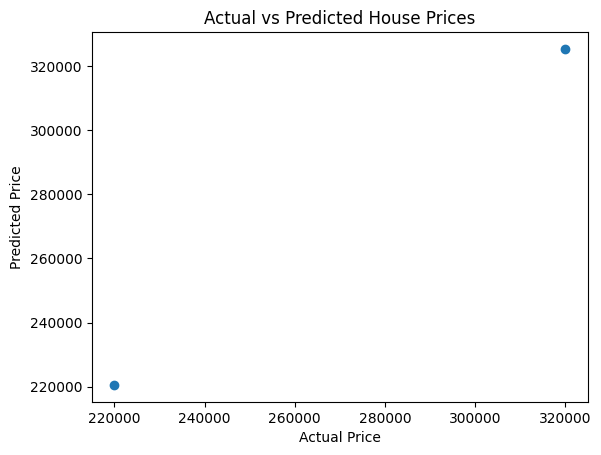

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- Step 1: Load your data ---

# Example: load from CSV
# df = pd.read_csv('house_data.csv')

# For demonstration, create synthetic example data
data = {
    'Bedrooms': [2, 3, 4, 3, 5, 4, 3, 2, 4, 5],
    'Bathrooms': [1, 2, 3, 2, 4, 3, 2, 1, 3, 4],
    'SquareFeet': [1000, 1500, 2000, 1600, 2500, 2200, 1400, 1100, 2100, 2600],
    'Age': [10, 5, 2, 7, 1, 3, 8, 12, 2, 1],
    'Price': [150000, 220000, 300000, 240000, 400000, 350000, 210000, 160000, 320000, 420000]
}
df = pd.DataFrame(data)

print(df.head())

# --- Step 2: Define features (X) and target (y) ---
X = df.drop('Price', axis=1)
y = df['Price']

# --- Step 3: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Feature Scaling (optional but recommended) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 5: Train a regression model ---
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# --- Step 6: Make predictions ---
y_pred = model.predict(X_test_scaled)

# --- Step 7: Evaluate model ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R² Score:", r2)

# --- Step 8: Predict for a new house ---
new_house = pd.DataFrame({
    'Bedrooms': [3],
    'Bathrooms': [2],
    'SquareFeet': [1800],
    'Age': [4]
})

new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)
print("\nPredicted Price for new house:", predicted_price[0])

# --- Optional: Plot predicted vs actual ---
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()